<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Aikasarja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Jenny')

Päivitetty 2024-03-17 / Jenny


# OSA 1 aikasarjat

In [32]:
# Asennetaan ensin yfinance-kirjasto

!pip install yfinance

In [33]:
# Haetaan pandas -kirjasto
import pandas as pd

# Tuodaan myös tarvittava grafiikka
import matplotlib.pyplot as plt
import seaborn as sns

# Datan noutamiseen Yahoon Finance -palvelusta
import yfinance as yf

# Valitaan myös tyyli
sns.set_style('whitegrid')

# Haetaan aineisto
> Haetaan kahden pörssiosakkeen kurssihistoria Yahoon Finance -palvelusta osoitteesta https://finance.yahoo.com/.

In [34]:
# Haetaan kahden pankin kurssihistoria 2018 vuodesta eteenpäin
nordea = yf.download('NDA-FI.HE', start = '2018-01-01')
aktia = yf.download('Aktia.He', start = '2018-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [35]:
# Katsotaan miltä aieistot näyttävät

nordea

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.150,10.190,10.080,10.130,6.816965,1260289
2018-01-03,10.140,10.180,10.070,10.150,6.830424,1560190
2018-01-04,10.170,10.360,10.170,10.310,6.938096,1761646
2018-01-05,10.340,10.340,10.190,10.300,6.931366,1531630
2018-01-08,10.340,10.340,10.200,10.240,6.890989,1670973
...,...,...,...,...,...,...
2024-03-11,11.470,11.470,11.244,11.256,11.256000,7467463
2024-03-12,11.290,11.368,11.222,11.358,11.358000,6061497
2024-03-13,11.344,11.484,11.250,11.448,11.448000,5553115


In [36]:
aktia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,9.11,9.28,9.08,9.13,7.083105,132556
2018-01-03,9.19,9.22,9.13,9.19,7.129652,48758
2018-01-04,9.20,9.35,9.20,9.34,7.246024,45625
2018-01-05,9.36,9.40,9.35,9.37,7.269297,36959
2018-01-08,9.40,9.47,9.37,9.46,7.339119,43533
...,...,...,...,...,...,...
2024-03-11,9.42,9.46,9.32,9.40,9.400000,63082
2024-03-12,9.40,9.45,9.35,9.44,9.440000,36547
2024-03-13,9.47,9.53,9.41,9.41,9.410000,40808


Piiretään kurssikehykset 2018 vuodesta tähän päivään asti. Viivakuviolla havainnoillistetaan osakekurssien arvojen muutokset.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria')

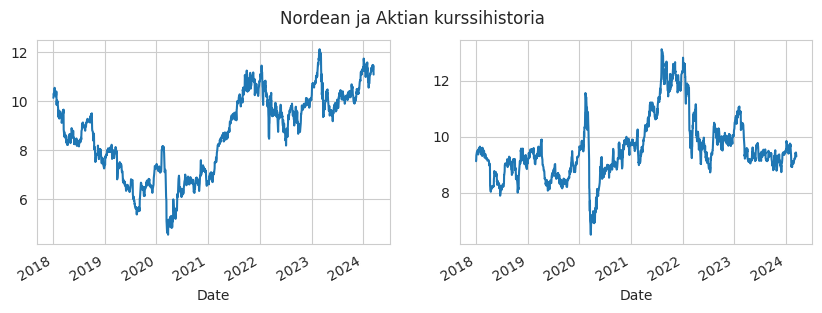

In [37]:
# Luodaan ensin 2 tyhjää pohjaa.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

# Laitetaan tyhjiin pohjiin valittu aineisto
nordea['Close'].plot(ax=axs[0])
aktia['Close'].plot(ax=axs[1])

# Otsikoidaan
fig.suptitle('Nordean ja Aktian kurssihistoria')

Molemmissa nähtävissä 2020 vuoden alussa alas menevä piikki, kun COVID-19 saapui Suomeen.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria 2024 vuoden alusta')

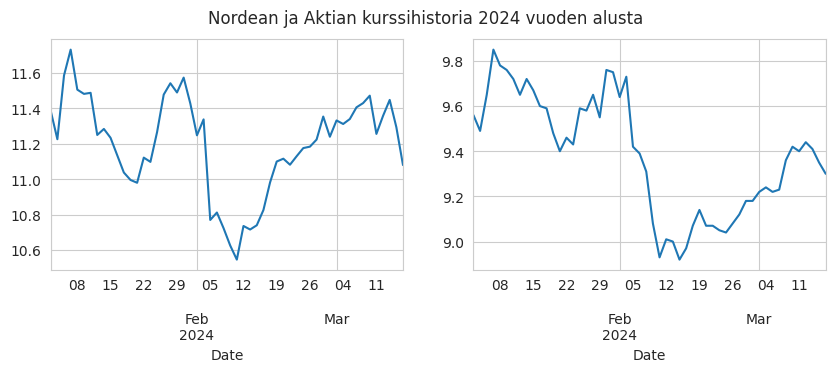

In [38]:
# Katsotaan kurssien kehitys tämän vuoden alusta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close']['2024':].plot(ax=axs[0])
aktia['Close']['2024':].plot(ax=axs[1])

fig.suptitle('Nordean ja Aktian kurssihistoria 2024 vuoden alusta')

Nordean ja Aktian kehitys on ollut samansuuntaista.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria 2018 - 2020-01')

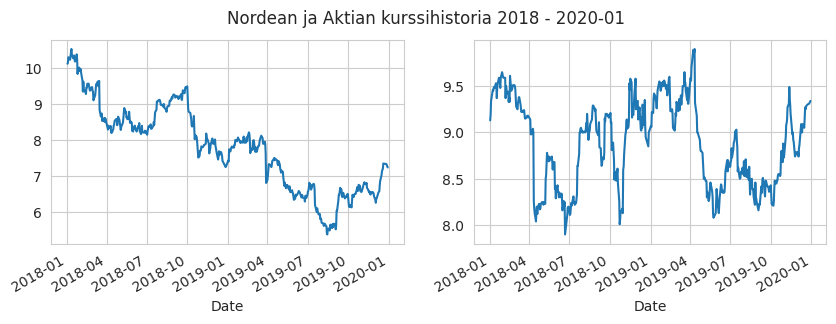

In [39]:
# Katsotaan kurssien kehitys ennen Covid-19
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close']['2018':'2019'].plot(ax=axs[0])
aktia['Close']['2018':'2019'].plot(ax=axs[1])

fig.suptitle('Nordean ja Aktian kurssihistoria 2018 - 2020-01')

Nordean kurssin kehitys ollut laskusuuntainen ja Aktialla kehitys ollut hyvin vaihtelevaa.

Selkiytettään enempi Aggeroinnin avulla käyttäen **resample** -funktiota.

Text(0.5, 0.98, 'Nordean ja Aktion kurssihistoria kuukausitasolla')

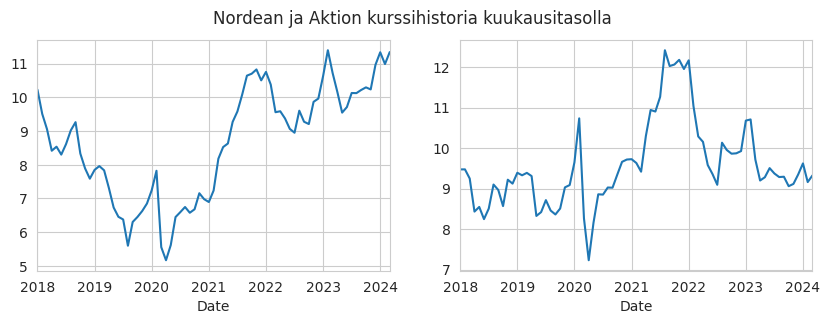

In [40]:
# Aggeroidaan kuukausitasolle käyttäen resample() -funktiota, josta otetaan vielä kuukausittainen keskiarvo.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close'].resample('M').mean().plot(ax=axs[0])
aktia['Close'].resample('M').mean().plot(ax=axs[1])

fig.suptitle('Nordean ja Aktion kurssihistoria kuukausitasolla')

Katsotaan vielä osakkeiden vaihdon määrät (kpl) vuosineljänneksittäin

Text(0.5, 0.98, 'Nordean ja Aktion kurssihistoria kuukausitasolla')

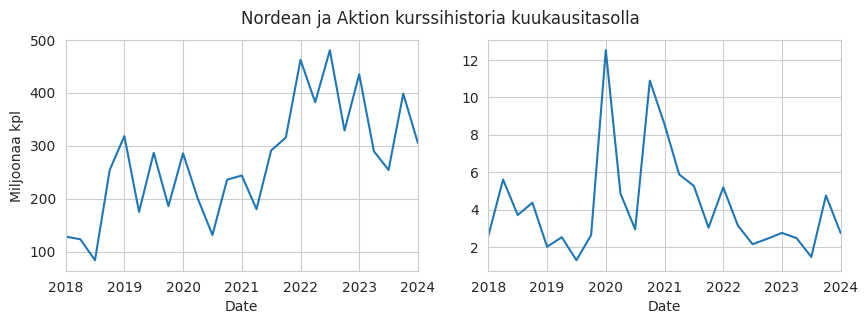

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

# Selkiytetään viivakuviota jakamalla 1milj. jolloin on helpompi vertailla
# Käytetään myös 'Q', jolloin saadaan vuosineljännes
(nordea['Volume']/1000000).resample('Q').sum().plot(ax=axs[0])
(aktia['Volume']/1000000).resample('Q').sum().plot(ax=axs[1])

axs[0].set_ylabel('Miljoonaa kpl')
fig.suptitle('Nordean ja Aktion kurssihistoria kuukausitasolla')

Nordealla voluumi ollut suurempaa ja vaihtelevaa nousevasti. Aktialla näkyy hetkellinen piikki 2019 loppu vuodesta ja 2020 alkuvuodesta, minkä jälkeen jyrkkä lasku. 2020 vuoden puolivälistä lähtenyt uudelleen nousuun, mutta kuitenkin alkanut laskemaan.

## Liukuvat keskiarvot
> Käytetään **rolling** -funktiota tasoittamaan aikasarjojen satunnaisia piikkejä.

Text(0.5, 1.0, 'Nordean päätöskurssien liukuvat keskiarvot')

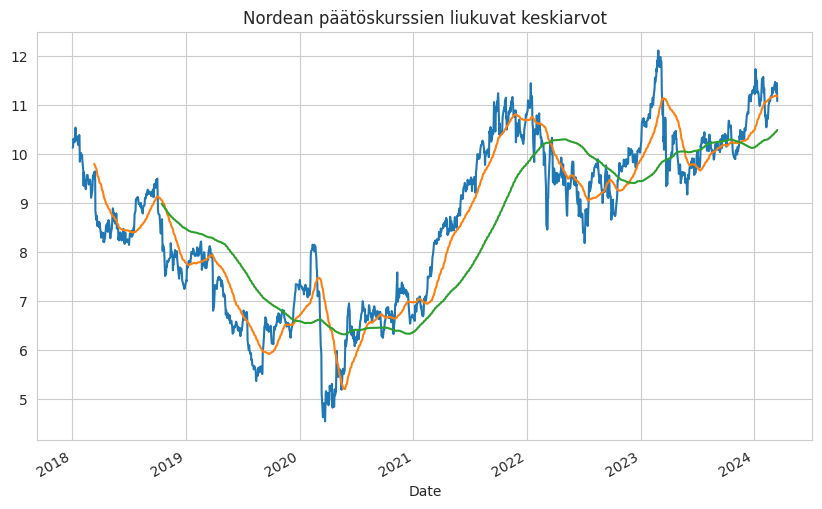

In [42]:
# Nordean päätöskurssien hinnat
nordea['Close'].plot(figsize= (10, 6))

# Nordean päätöskurssien 50 päivän liukuvat keskiarvot
nordea['Close'].rolling(50).mean().plot()

# Nordean päätöskurssien 200 päivän liukuvat keskiarvot
nordea['Close'].rolling(200).mean().plot()
plt.title('Nordean päätöskurssien liukuvat keskiarvot')

Text(0.5, 1.0, 'Aktia päätöskurssien liukuvat keskiarot')

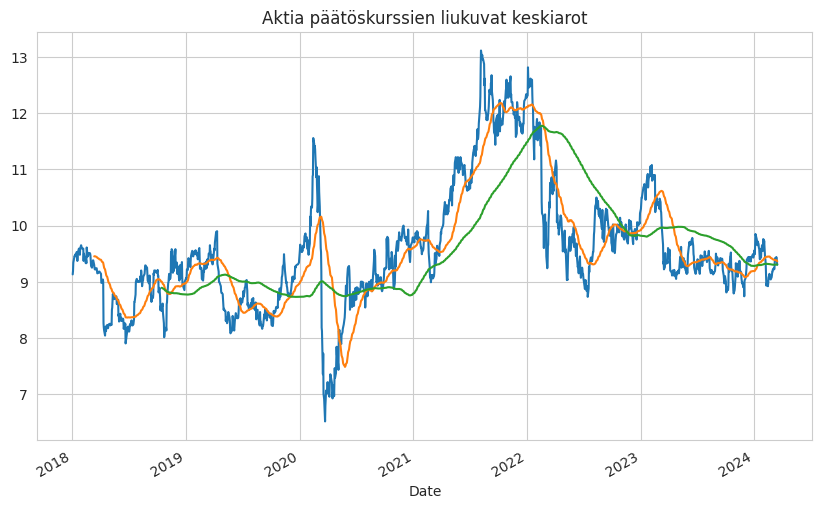

In [43]:
# Aktian päätöskurssien hinnat
aktia['Close'].plot(figsize= (10,6))

# Aktian päätöskurssien 50 päivän liukuvat keskiarvot
aktia['Close'].rolling(50).mean().plot()

# Aktian päätöskurssien 200 päivän liukuvat keskiarvot
aktia['Close'].rolling(200).mean().plot()
plt.title('Aktia päätöskurssien liukuvat keskiarot')

Nordean ja Aktian päätöskurssien liukuvat keskiarvot ovat olleen 2020 vuodesta lähtien samansuuntaiset.

## Nordean ja Aktian muutosprosentit

In [44]:
#  Osakekurssien arvon muutokset prosentteina edellisestä kaupanteko päivästä.
nordea['Nordea%'] = nordea['Close'].pct_change()
aktia['Aktia%'] = aktia['Close'].pct_change()

In [45]:
# Muodostetaan uusi aineistoa edellälasketuista muutosprosenteista.
muutos = pd.concat([nordea['Nordea%'], aktia['Aktia%']], axis = 1)

# Jos aineisto sisältää puuttuvia arvoja, joten korvataan arvot nollalla.
muutos = muutos.fillna(0)

muutos

,Nordea%,Aktia%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.001974,0.006572
2018-01-04,0.015764,0.016322
2018-01-05,-0.000970,0.003212
2018-01-08,-0.005825,0.009605
...,...,...
2024-03-11,-0.018829,-0.002123
2024-03-12,0.009062,0.004255
2024-03-13,0.007924,-0.003178


<Axes: xlabel='Date'>

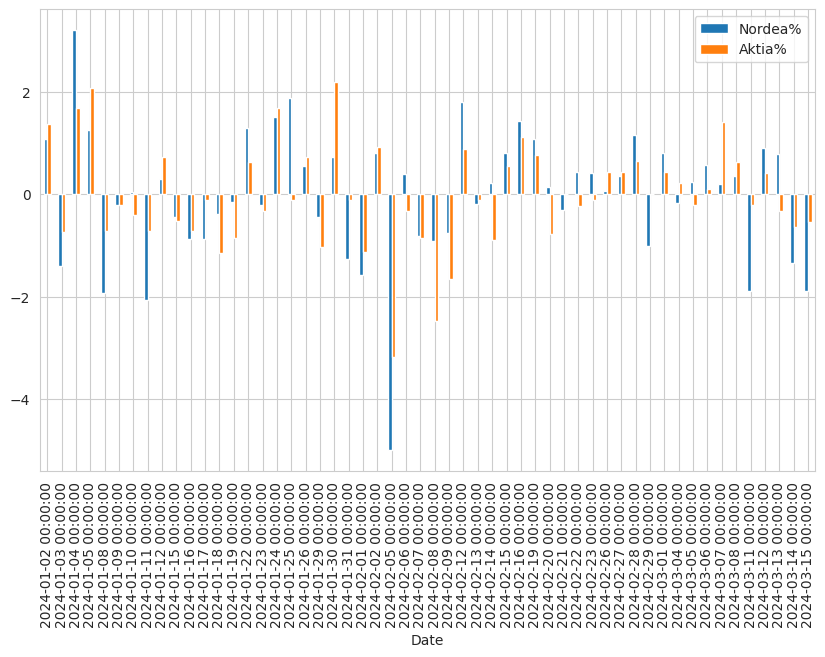

In [46]:
# Tehdään fistogrammin, jossa käydään päivittäiset muutokset läpi.
# Muutetaan prosenteiksi kertomalla 100
(muutos['2024':]*100).plot.bar(figsize = (10, 6))

In [47]:
# Tilastolliset tunnusluvut muutosprosenteille, pyöristettynä 2 descimaalille.
(muutos*100).describe().round(2)

,Nordea%,Aktia%
count,1562.00,1562.00
mean,0.02,0.01
std,1.79,1.54
min,-13.93,-10.89
25%,-0.80,-0.72
50%,0.06,0.00
75%,0.94,0.75
max,8.87,9.29


<Axes: >

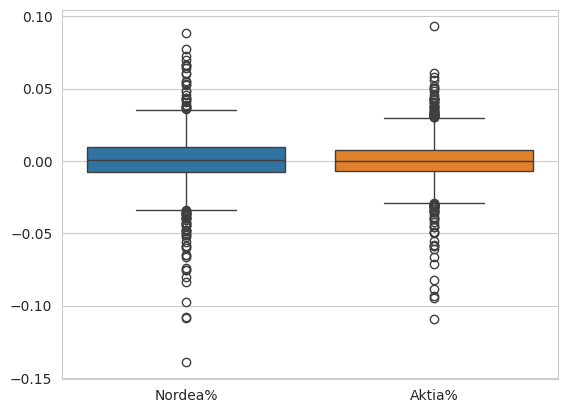

In [48]:
# Graaffisesti

sns.boxplot(data=muutos)

Keskiarvoltaan Nordea ja Aktia tasoissa.

## Muutosprosentten korrelaatio

In [49]:
muutos.corr()

,Nordea%,Aktia%
Nordea%,1.000000,0.471539
Aktia%,0.471539,1.000000


Korrelaatiokerroin 0,47

<Axes: xlabel='Nordea%', ylabel='Aktia%'>

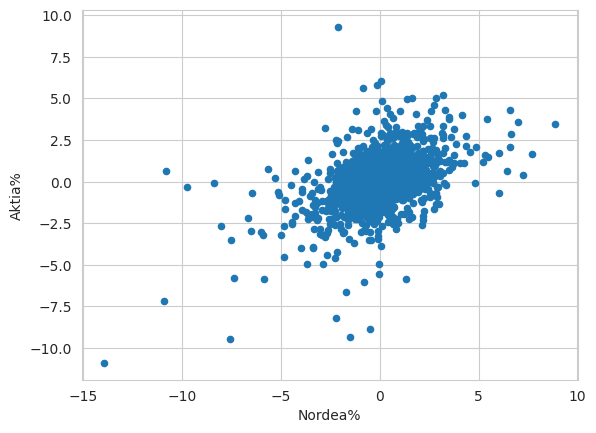

In [50]:
# Graaffisesti

(muutos*100).plot(kind = 'scatter', x = 'Nordea%',  y = 'Aktia%')

Kun Nordean arvo nousee, silloin myös Aktian osake nousee.

<Axes: xlabel='Date'>

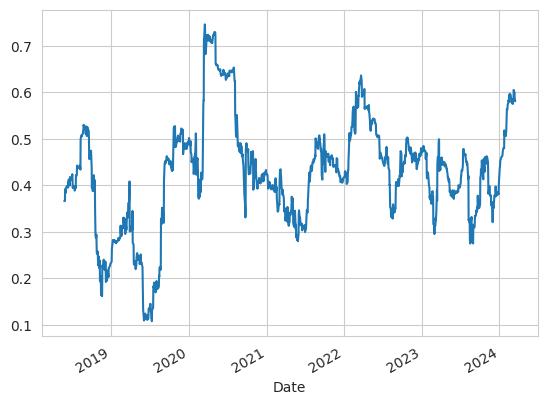

In [51]:
## Liukuva korrelaatioa

muutos['Nordea%'].rolling(100).corr(muutos['Aktia%']).plot()

2019 vuoden puolivälissä korrelaatio ollut lähimpänä nollaa, jolloin arvoissa on ollut eniten hajontaa.

# Liukuva volatiliteetti

<Axes: xlabel='Date'>

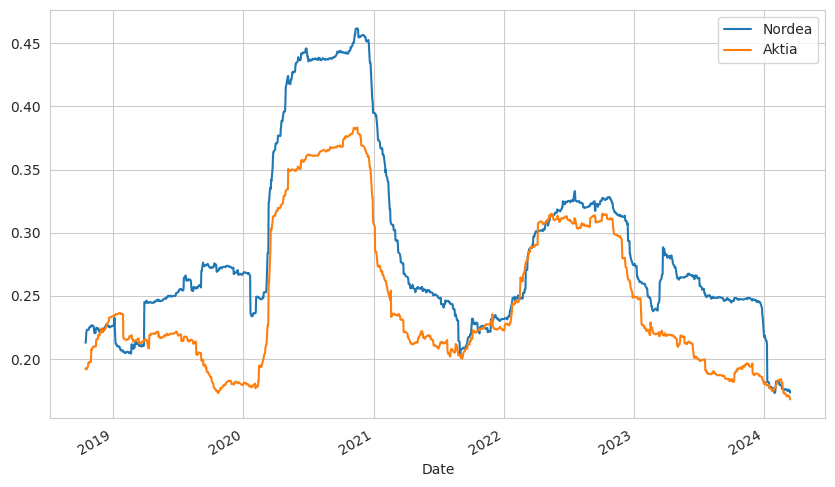

In [52]:
plt.figure(figsize=(10,6))

# 200 päivän liukuva volatiliteetti rolling()- funktiolla
(muutos['Nordea%'].rolling(200).std()*(252**0.5)).plot(label = 'Nordea', legend = True)
(muutos['Aktia%'].rolling(200).std()*(252**0.5)).plot(label = 'Aktia', legend = True)

Nordealla ajoitta ollut korkeampi riski 2020 vuonna ja 2023. 2020 vuonna Nordean riski ollut 45%. Näinä vuosina noin $5$% eroa Aktiaan verrattuna.

# Kahden arvoakselin viivakaavio

Text(0.5, 1.0, 'Nordean ja Aktian osakkeiden päätöskurssien hintakehitys')

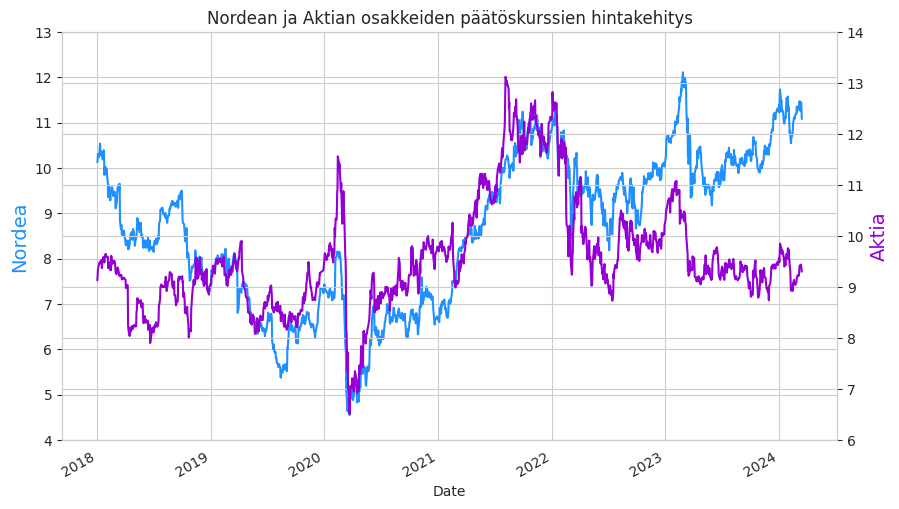

In [53]:
# Tehdä samaan kaavio Nordean ja Aktian päätöshinnat eri suuruusluokissa.

# Tehdään ensin tyhjä kaavio
plt.figure(figsize= (10,6))

# Viivakuvio Nordean päätöshinnoista
nor = nordea['Close'].plot(color= 'dodgerblue')

# Taulukkoon Nordean nimi, väri, fonttikoko
plt.ylabel('Nordea', color = 'dodgerblue', fontsize=14)

# Skaalaan Nordean arvoasteikko
plt.ylim(4, 13)

# Luodaan Aktialle kaavio, jolla on yhteinen vaaka-akseli Nordean kanssa
akt = nor.twinx()

# Viivakuvio Aktian päätöshinnoista

aktia['Close'].plot(ax = akt, color = 'darkviolet')

# Muotoillaan kaavioon Aktian nimi, fonttikoko ja väri
plt.ylabel('Aktia', color = 'darkviolet', fontsize=14)

# Aktian arvoakselin skaalaus
plt.ylim(6, 14)

# Lopuksi vielä annetaan kuviolle otsikko
plt.title('Nordean ja Aktian osakkeiden päätöskurssien hintakehitys')

Nordealla ollut hintakehitystä 2020 vuodesta nykyhetkeen ~ 5€. Aktialla hintakehitys oli nouseva 2020-2022, minkä jälkeen ollut laskua ~ 3€.